<a href="https://colab.research.google.com/github/aaa-aashna/iris-classification-ml-basics/blob/main/Section5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


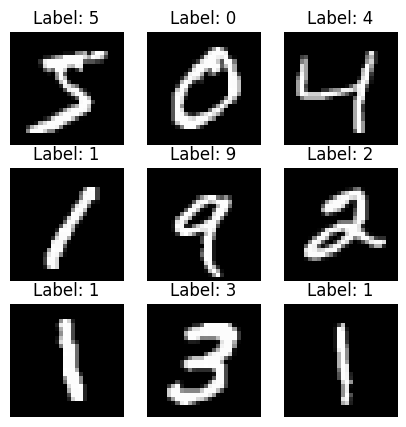

In [7]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

plt.figure(figsize=(5,5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [10]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [11]:
model = Sequential([
Flatten(input_shape=(28,28)), # Flatten image to vector (784,)
Dense(128, activation='relu'), # Hidden layer
Dense(64, activation='relu'), # Hidden layer
Dense(10, activation='softmax') # Output layer (10 classes)
])
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train_cat,
validation_split=0.1,
epochs=10,
batch_size=128,
verbose=2)

Epoch 1/10
422/422 - 4s - 10ms/step - accuracy: 0.9000 - loss: 0.3625 - val_accuracy: 0.9592 - val_loss: 0.1453
Epoch 2/10
422/422 - 3s - 6ms/step - accuracy: 0.9560 - loss: 0.1520 - val_accuracy: 0.9682 - val_loss: 0.1097
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.9691 - loss: 0.1050 - val_accuracy: 0.9702 - val_loss: 0.0993
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9771 - loss: 0.0784 - val_accuracy: 0.9738 - val_loss: 0.0942
Epoch 5/10
422/422 - 3s - 6ms/step - accuracy: 0.9826 - loss: 0.0606 - val_accuracy: 0.9737 - val_loss: 0.0909
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9868 - loss: 0.0475 - val_accuracy: 0.9738 - val_loss: 0.0879
Epoch 7/10
422/422 - 3s - 6ms/step - accuracy: 0.9901 - loss: 0.0373 - val_accuracy: 0.9757 - val_loss: 0.0888
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.9926 - loss: 0.0290 - val_accuracy: 0.9762 - val_loss: 0.0899
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9944 - loss: 0.0233 - val_accuracy: 0.9753 - val_loss: 0.0937


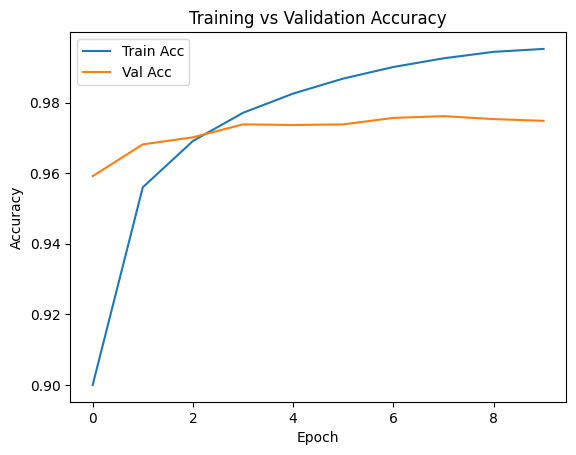

In [13]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.3f}")


Test Accuracy: 0.972


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


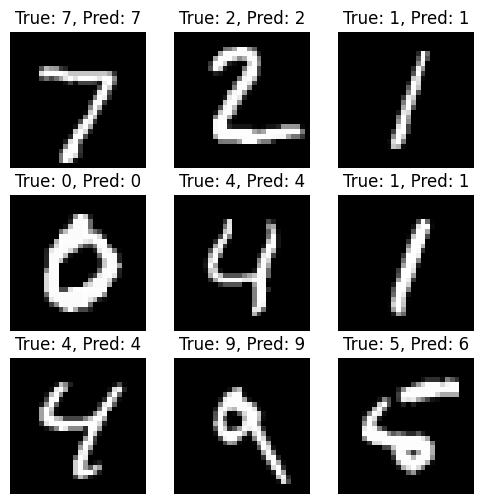

In [17]:
import matplotlib.pyplot as plt
import numpy as np

preds = model.predict(X_test[:9])

plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(preds[i])}")
    plt.axis('off')

plt.show()


By varying layers, neurons, activation functions, and epochs, it was observed that increasing model complexity improves training accuracy but can cause overfitting. A balanced architecture with ReLU activation and optimal epochs provides the best generalization.

In [18]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [19]:
def build_model(neurons=256, activation='relu', layers=1):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for _ in range(layers):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
model_256 = build_model(neurons=256)
history_256 = model_256.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=0
)

model_128 = build_model(neurons=128)
history_128 = model_128.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=0
)


In [ ]:
model_relu = build_model(activation='relu')
history_relu = model_relu.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=0
)

model_tanh = build_model(activation='tanh')
history_tanh = model_tanh.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=0
)

model_sigmoid = build_model(activation='sigmoid')
history_sigmoid = model_sigmoid.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=0
)
